In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'gender_submission.csv', 'test.csv']


In [2]:
# reading the dataset into dataframes
train= pd.read_csv("../input/train.csv")
test= pd.read_csv("../input/test.csv")

In [3]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
print("Shape of train data: {}".format(train.shape))
print("Shape of test data: {}".format(test.shape))

Shape of train data: (891, 12)
Shape of test data: (418, 11)


As we see there is one column missing from the test data. lets see which column is that

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


**"Survived"** column is missing from test data, as this is our **Independent/Target variable.**

## Data Cleaning

In [8]:
round((train.isnull().sum()/len(train.index))*100,2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

As we see "Age", "Cabin" and "Embarked" columns are having null values.
Dropping the "Cabin" column as as it is having 77% of missing and filling the Age and Embarked with mean and mode respectively.

In [9]:
train.drop("Cabin", axis=1,inplace=True)
train['Age']=train['Age'].fillna(train['Age'].mean())
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode().iloc[0])

In [10]:
round((test.isnull().sum()/len(test.index))*100,2)

PassengerId     0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            20.57
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.24
Cabin          78.23
Embarked        0.00
dtype: float64

As we see "Age", "Cabin" and "Fare" columns are having null values in Test dataset.
Dropping the "Cabin" column as as it is having 78% of missing and filling the Age and Fare with mean. 

In [11]:
test.describe()

PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200

In [12]:
test.drop("Cabin", axis=1,inplace=True)
test['Age']=test['Age'].fillna(test['Age'].mean())
test['Fare']=test['Fare'].fillna(test['Fare'].mean())

In [13]:
print(" checking the Missing values again on train and test dataset:")
print("*"*50)
print("Train")
round((train.isnull().sum()/len(train.index))*100,2)

 checking the Missing values again on train and test dataset:
**************************************************
Train


PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

In [14]:
print("Test")
round((test.isnull().sum()/len(test.index))*100,2)

Test


PassengerId    0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

In [15]:
# dropping "Ticket" is it is of no use
train.drop("Ticket", axis=1,inplace=True)
test.drop("Ticket", axis=1,inplace=True)

In [16]:
train.head(10)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex        Age  \
0                            Braund, Mr. Owen Harris    male  22.000000   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
2                             Heikkinen, Miss. Laina  female  26.000000   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000   
4                           Allen, Mr. William Henry    male  35.000000   
5                                   Moran, Mr. James    male  29.699118   
6                            McCarthy, Mr. Timothy J    male  54.000000   
7                     Palsson, Master. Gosta Leonard    male   2.000000   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.000000   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.000000   

   SibSp  Parch     Fare Embarked  
0      1      0   7.2500        S  
1      1      0  71.2833        C  
2      0      0   7.9250        S  
3      1      0  53.1000        S  
4      0      0   8.0500        S  
5      0      0   8.4583        Q  
6      0      0  51.8625        S  
7      3      1  21.0750        S  
8      0      2  11.1333        S  
9      1      0  30.0708        C

In [17]:
train.shape, test.shape

((891, 10), (418, 9))

In [18]:
#combining both train and test data for further operation:
combine_dataset=[train,test]


[](http://)#### Creating new variables

In [19]:
#creating new column containing total family size:
for dataset in combine_dataset:
    dataset["Family_size"]=dataset['SibSp']+dataset['Parch']+1

#created a column, indicating 1 if the person is traveling alone.
for dataset in combine_dataset:
    dataset["Traveling_alone"]= dataset['Family_size'].map(lambda x: 1 if x==1 else 0 )

In [20]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch     Fare Embarked  Family_size  Traveling_alone  
0      0   7.2500        S            2                0  
1      0  71.2833        C            2                0  
2      0   7.9250        S            1                1  
3      0  53.1000        S            2                0  
4      0   8.0500        S            1                1

In [21]:
#extracting titles from the names:

for dataset in combine_dataset:
    dataset["Title"]=dataset.Name.str.extract(' ([A-Za-z]+)\.' , expand=False)

print(train['Title'].value_counts())

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Jonkheer      1
Sir           1
Capt          1
Don           1
Mme           1
Lady          1
Countess      1
Ms            1
Name: Title, dtype: int64


In [22]:
for dataset in combine_dataset:
    dataset['Title']=dataset['Title'].replace(['Ms','Mlle'], 'Miss')
    dataset['Title']=dataset['Title'].replace('Mme', 'Mrs')
    dataset['Title']=dataset['Title'].replace(['Dr','Rev','Major','Col','Sir','Jonkheer', 'Dona', 'Don', 'Countess', 'Lady', 'Capt'], 'Rare')
    
train[['Title', 'Survived']].groupby(['Title'],as_index=False).mean()

Title  Survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.156673
3     Mrs  0.793651
4    Rare  0.347826

In [23]:
#mapping numeric values to Titles:
for dataset in combine_dataset:
    dataset['Title'] = dataset['Title'].map({"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5})

train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch     Fare Embarked  Family_size  Traveling_alone  Title  
0      0   7.2500        S            2                0      1  
1      0  71.2833        C            2                0      3  
2      0   7.9250        S            1                1      2  
3      0  53.1000        S            2                0      3  
4      0   8.0500        S            1                1      1

In [24]:
# binning age:

for dataset in combine_dataset:  
    dataset['Age']=dataset['Age'].astype('int')
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male    1      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female    2      1   
2                             Heikkinen, Miss. Laina  female    1      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female    2      1   
4                           Allen, Mr. William Henry    male    2      0   

   Parch     Fare Embarked  Family_size  Traveling_alone  Title  
0      0   7.2500        S            2                0      1  
1      0  71.2833        C            2                0      3  
2      0   7.9250        S            1                1      2  
3      0  53.1000        S            2                0      3  
4      0   8.0500        S            1                1      1

In [25]:
#mapping numeric values to Titles:
for dataset in combine_dataset:
    dataset['Sex'] = dataset['Sex'].map({"male": 0, "female": 1}).astype(int)

train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex  Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0    1      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1    2      1      0   
2                             Heikkinen, Miss. Laina    1    1      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1    2      1      0   
4                           Allen, Mr. William Henry    0    2      0      0   

      Fare Embarked  Family_size  Traveling_alone  Title  
0   7.2500        S            2                0      1  
1  71.2833        C            2                0      3  
2   7.9250        S            1                1      2  
3  53.1000        S            2                0      3  
4   8.0500        S            1                1      1

In [26]:
def fare_bin(x):
    if x <= 8:
        return 0
    elif x>8 and x <= 14:
        return 1
    elif x>14 and x <= 31:
        return 2
    else:
        return 3

for dataset in combine_dataset:
    dataset['Fare'] = dataset['Fare'].apply(fare_bin)
    dataset['Fare'] = dataset['Fare'].astype(int)

train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex  Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0    1      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1    2      1      0   
2                             Heikkinen, Miss. Laina    1    1      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1    2      1      0   
4                           Allen, Mr. William Henry    0    2      0      0   

   Fare Embarked  Family_size  Traveling_alone  Title  
0     0        S            2                0      1  
1     3        C            2                0      3  
2     0        S            1                1      2  
3     3        S            2                0      3  
4     1        S            1                1      1

In [27]:
#Dropping Name, Parch and SibSp as there is no further need:

train.drop(['PassengerId','Name','Parch', 'SibSp'], axis=1,inplace=True)
test.drop(['Name','Parch', 'SibSp'], axis=1,inplace=True)

In [28]:
train.shape, test.shape

((891, 9), (418, 9))

#### Creating Dummy Variables

In [29]:
test.head()

PassengerId  Pclass  Sex  Age  Fare Embarked  Family_size  Traveling_alone  \
0          892       3    0    2     0        Q            1                1   
1          893       3    1    2     0        S            2                0   
2          894       2    0    3     1        Q            1                1   
3          895       3    0    1     1        S            1                1   
4          896       3    1    1     1        S            3                0   

   Title  
0      1  
1      3  
2      1  
3      1  
4      3

In [30]:
dummy=pd.get_dummies(train[['Embarked']],drop_first=True)
# Add the results to the master dataframe
train = pd.concat([train, dummy], axis=1)

dummy1=pd.get_dummies(test[['Embarked']],drop_first=True)
# Add the results to the master dataframe
test = pd.concat([test, dummy], axis=1)

train.drop(['Embarked'], axis=1, inplace=True)
test.drop(['Embarked'], axis=1, inplace=True)

In [31]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Family_size',
       'Traveling_alone', 'Title', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [32]:
test.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'Fare', 'Family_size',
       'Traveling_alone', 'Title', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [33]:
#putting feature Variables in X
X_train = train.drop(['Survived'], axis=1)
X_train.head()

Pclass  Sex  Age  Fare  Family_size  Traveling_alone  Title  Embarked_Q  \
0       3    0    1     0            2                0      1           0   
1       1    1    2     3            2                0      3           0   
2       3    1    1     0            1                1      2           0   
3       1    1    2     3            2                0      3           0   
4       3    0    2     1            1                1      1           0   

   Embarked_S  
0           1  
1           0  
2           1  
3           1  
4           1

In [34]:
# Put the target variable in y
y_train = train['Survived']
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

## Feature scaling

In [35]:
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler

# Scale the three numeric features present in the dataset
scaler = MinMaxScaler()
X_train[['Pclass','Age','Fare','Family_size','Title']] = scaler.fit_transform(X_train[['Pclass','Age','Fare','Family_size','Title']])
X_train.head()

Pclass  Sex   Age      Fare  Family_size  Traveling_alone  Title  \
0     1.0    0  0.25  0.000000          0.1                0   0.00   
1     0.0    1  0.50  1.000000          0.1                0   0.50   
2     1.0    1  0.25  0.000000          0.0                1   0.25   
3     0.0    1  0.50  1.000000          0.1                0   0.50   
4     1.0    0  0.50  0.333333          0.0                1   0.00   

   Embarked_Q  Embarked_S  
0           0           1  
1           0           0  
2           0           1  
3           0           1  
4           0           1

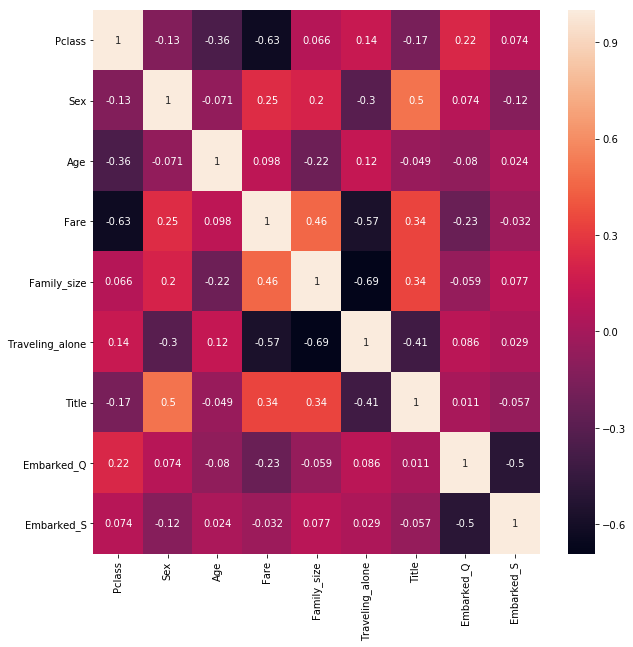

In [36]:
plt.figure(figsize=(10,10))
sns.heatmap(X_train.corr(), annot=True)

##  Model Building

In [37]:
col=X_train.columns

In [38]:
# Import statsmodels
import statsmodels.api as sm

In [39]:
#adding a constant
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())

# Fit a logistic Regression model on X_train
res = logm2.fit()
res.summary()

/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      881
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -380.61
Date:                Sat, 31 Aug 2019   Deviance:                       761.23
Time:                        20:38:41   Pearson chi2:                     876.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.1617      0.559      2.077      0.038       0.066       2.258
Pclass             -2.0087      0.347     -5.796      0.000      -2.688      -1.329
Sex                 2.3042      0.211     10.916      0.000       1.891       2.718
Age                -2.3326      0.513     -4.549      0.000      -3.338      -1.328
Fare                0.1742      0.444      0.393      0.695      -0.696       1.044
Family_size        -4.2408      1.046     -4.054      0.000      -6.291      -2.190
Traveling_alone    -0.5586      0.297     -1.882      0.060      -1.140       0.023
Title               1.8658      0.386      4.830      0.000       1.109       2.623
Embarked_Q         -0.1293      0.389     -0.332      0.740      -0.892       0.633
Embarked_S         -0.3955      0.241     -1.643      0.100      -0.867       0.076
===================================================================================
"""

In [40]:
X_train.drop('Embarked_Q', axis=1, inplace=True)

In [41]:
# Import VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [42]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
5  Traveling_alone  4.31
3             Fare  4.19
0           Pclass  3.95
7       Embarked_S  3.59
2              Age  3.53
4      Family_size  3.20
6            Title  2.25
1              Sex  2.08

In [43]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      882
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -380.67
Date:                Sat, 31 Aug 2019   Deviance:                       761.34
Time:                        20:38:41   Pearson chi2:                     878.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.1236      0.547      2.053      0.040       0.051       2.196
Pclass             -2.0180      0.345     -5.844      0.000      -2.695      -1.341
Sex                 2.2973      0.210     10.950      0.000       1.886       2.709
Age                -2.3357      0.513     -4.557      0.000      -3.340      -1.331
Fare                0.1976      0.438      0.451      0.652      -0.661       1.056
Family_size        -4.2651      1.043     -4.089      0.000      -6.310      -2.220
Traveling_alone    -0.5662      0.296     -1.915      0.055      -1.146       0.013
Title               1.8589      0.385      4.825      0.000       1.104       2.614
Embarked_S         -0.3522      0.203     -1.739      0.082      -0.749       0.045
===================================================================================
"""

In [44]:
X_train.drop('Fare', axis=1, inplace=True)

In [45]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      883
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -380.77
Date:                Sat, 31 Aug 2019   Deviance:                       761.54
Time:                        20:38:41   Pearson chi2:                     882.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.3045      0.373      3.500      0.000       0.574       2.035
Pclass             -2.1256      0.251     -8.475      0.000      -2.617      -1.634
Sex                 2.2974      0.210     10.951      0.000       1.886       2.709
Age                -2.3360      0.513     -4.557      0.000      -3.341      -1.331
Family_size        -4.1102      0.985     -4.175      0.000      -6.040      -2.180
Traveling_alone    -0.6085      0.280     -2.171      0.030      -1.158      -0.059
Title               1.8582      0.385      4.822      0.000       1.103       2.613
Embarked_S         -0.3541      0.202     -1.750      0.080      -0.751       0.042
===================================================================================
"""

In [46]:
X_train.drop('Embarked_S', axis=1, inplace=True)

In [47]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      884
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -382.30
Date:                Sat, 31 Aug 2019   Deviance:                       764.59
Time:                        20:38:41   Pearson chi2:                     879.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.1171      0.357      3.131      0.002       0.418       1.816
Pclass             -2.1348      0.250     -8.537      0.000      -2.625      -1.645
Sex                 2.3264      0.209     11.110      0.000       1.916       2.737
Age                -2.3912      0.513     -4.659      0.000      -3.397      -1.385
Family_size        -4.3496      0.980     -4.437      0.000      -6.271      -2.428
Traveling_alone    -0.6583      0.279     -2.361      0.018      -1.205      -0.112
Title               1.8486      0.384      4.808      0.000       1.095       2.602
===================================================================================
"""

In [48]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
4  Traveling_alone  3.89
0           Pclass  3.23
2              Age  2.63
5            Title  2.18
3      Family_size  2.17
1              Sex  1.99

considering the P-value cutoff as 0.05 and VIF cutoff as 5, our dataset is now good to go !!!

## Model Evaluation

In [49]:
X_test=test

In [50]:
X_test[['Pclass','Age','Fare','Family_size','Title']] = scaler.transform(X_test[['Pclass','Age','Fare','Family_size','Title']])
X_test.head()

PassengerId  Pclass  Sex   Age      Fare  Family_size  Traveling_alone  \
0        892.0     1.0  0.0  0.50  0.000000          0.0              1.0   
1        893.0     1.0  1.0  0.50  0.000000          0.1              0.0   
2        894.0     0.5  0.0  0.75  0.333333          0.0              1.0   
3        895.0     1.0  0.0  0.25  0.333333          0.0              1.0   
4        896.0     1.0  1.0  0.25  0.333333          0.2              0.0   

   Title  Embarked_Q  Embarked_S  
0    0.0           0           1  
1    0.5           0           0  
2    0.0           0           1  
3    0.0           0           1  
4    0.5           0           1

In [51]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
X_test.head()

Pclass  Sex   Age      Fare  Family_size  Traveling_alone  Title  \
0     1.0  0.0  0.50  0.000000          0.0              1.0    0.0   
1     1.0  1.0  0.50  0.000000          0.1              0.0    0.5   
2     0.5  0.0  0.75  0.333333          0.0              1.0    0.0   
3     1.0  0.0  0.25  0.333333          0.0              1.0    0.0   
4     1.0  1.0  0.25  0.333333          0.2              0.0    0.5   

   Embarked_Q  Embarked_S  
0           0           1  
1           0           0  
2           0           1  
3           0           1  
4           0           1

In [52]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
# Check X_test_sm
X_test_sm.head()

/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const  Pclass  Sex   Age      Fare  Family_size  Traveling_alone  Title  \
0    1.0     1.0  0.0  0.50  0.000000          0.0              1.0    0.0   
1    1.0     1.0  1.0  0.50  0.000000          0.1              0.0    0.5   
2    1.0     0.5  0.0  0.75  0.333333          0.0              1.0    0.0   
3    1.0     1.0  0.0  0.25  0.333333          0.0              1.0    0.0   
4    1.0     1.0  1.0  0.25  0.333333          0.2              0.0    0.5   

   Embarked_Q  Embarked_S  
0           0           1  
1           0           0  
2           0           1  
3           0           1  
4           0           1

In [53]:
X_train_sm.head()

const  Pclass  Sex   Age      Fare  Family_size  Traveling_alone  Title  \
0    1.0     1.0    0  0.25  0.000000          0.1                0   0.00   
1    1.0     0.0    1  0.50  1.000000          0.1                0   0.50   
2    1.0     1.0    1  0.25  0.000000          0.0                1   0.25   
3    1.0     0.0    1  0.50  1.000000          0.1                0   0.50   
4    1.0     1.0    0  0.50  0.333333          0.0                1   0.00   

   Embarked_Q  Embarked_S  
0           0           1  
1           0           0  
2           0           1  
3           0           1  
4           0           1

In [54]:
y_test_pred = res.predict(X_test_sm)

In [55]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": round(y_test_pred)
    })

In [56]:
submission = submission[:418]

In [57]:
submission.tail()

PassengerId  Survived
413       1305.0       0.0
414       1306.0       1.0
415       1307.0       0.0
416       1308.0       0.0
417       1309.0       0.0

In [58]:
submission.PassengerId=submission.PassengerId.astype(int)
submission.Survived=submission.Survived.astype(int)

In [59]:
submission.tail()

PassengerId  Survived
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

In [60]:
submission.to_csv('submission.csv', index=False)

/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 